# Mengumpulkan Data

Data diambil dari link github: https://github.com/arubhasy/dataset/blob/main/Telco-Customer-Churn.csv

# Menelaah Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance



pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

## Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2024_ITK_DS_Training/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.00,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.00,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.00,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.00,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Menganalisis Tipe dan Relasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7040.00,7043.00
mean,0.16,35.04,64.76
std,0.37,115.28,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,7100.00,118.75


In [ ]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7038,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,4,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3550,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
missing_features = [features for features in df.columns if df[features].isnull().sum()>0]
len(missing_features)

2

In [ ]:
# for features in missing_features:
#   print(features, np.round(df[features].isnull().mean(), 4), ' % missing values')
for features in missing_features:
  print(features, np.round(df[features].isnull().sum()), 'missing values')

gender 5 missing values
tenure 3 missing values


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", sum(duplicate_rows))


Number of duplicate rows: 0


In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.drop('customerID', axis='columns', inplace=True)

### Visualization

#### Categorical Features

In [ ]:
cat_features = [features for features in df.columns if df[features].dtypes == 'O']
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

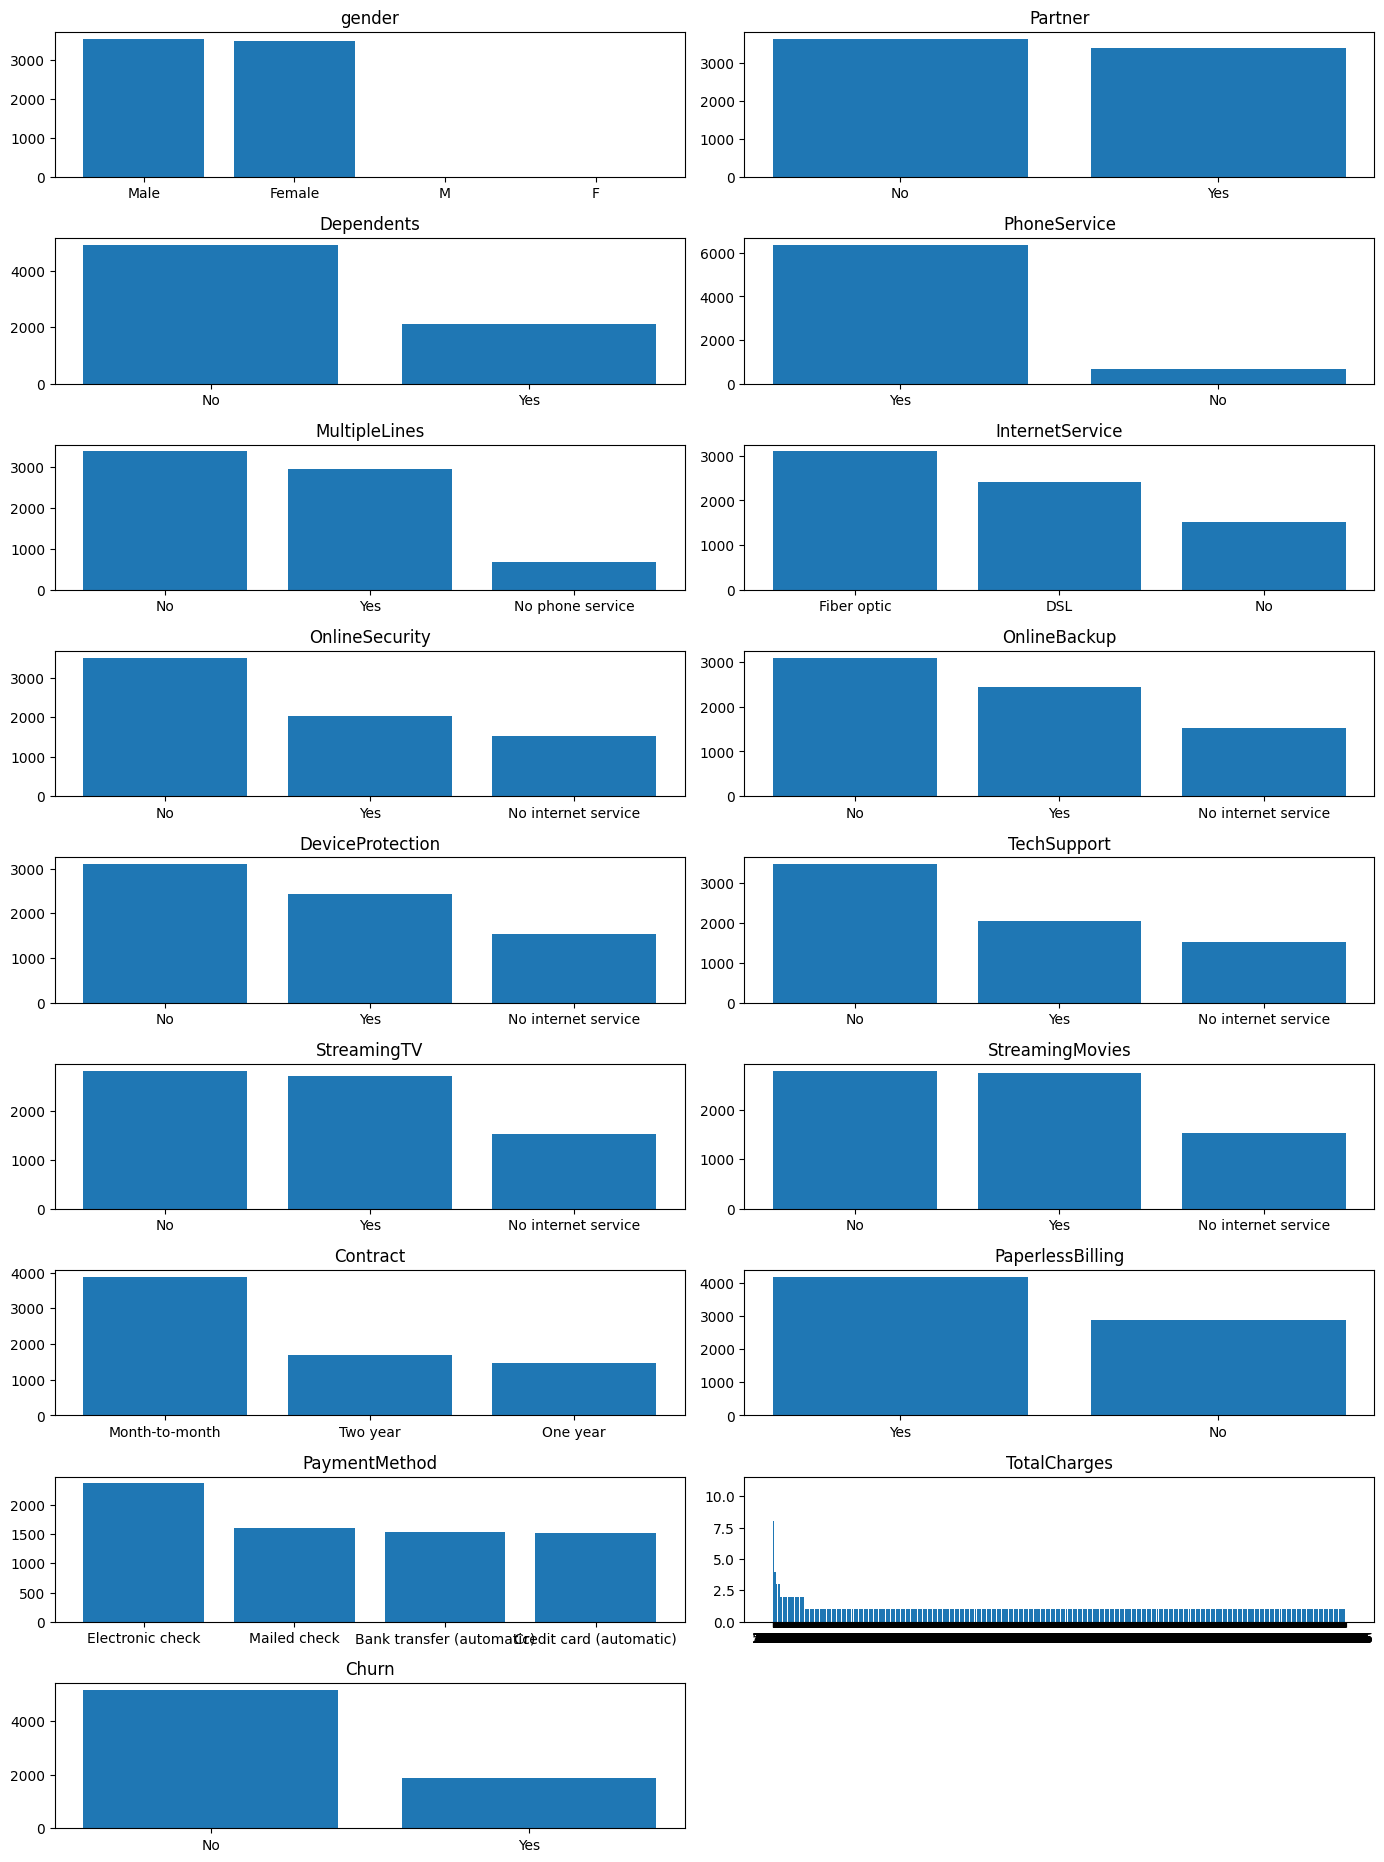

In [ ]:
fig = plt.figure(figsize=(14,35))

a = len(cat_features)
b = 2
c = 1

for features in cat_features:
  plt.subplot(a,b,c)
  data = df[features].value_counts()
  plt.bar(data.index, data.values)
  plt.title(features)
  c+=1

fig.tight_layout()
plt.show()

#### Numerical Features

In [ ]:
num_features = [features for features in df.columns if df[features].dtypes != 'O']
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges']

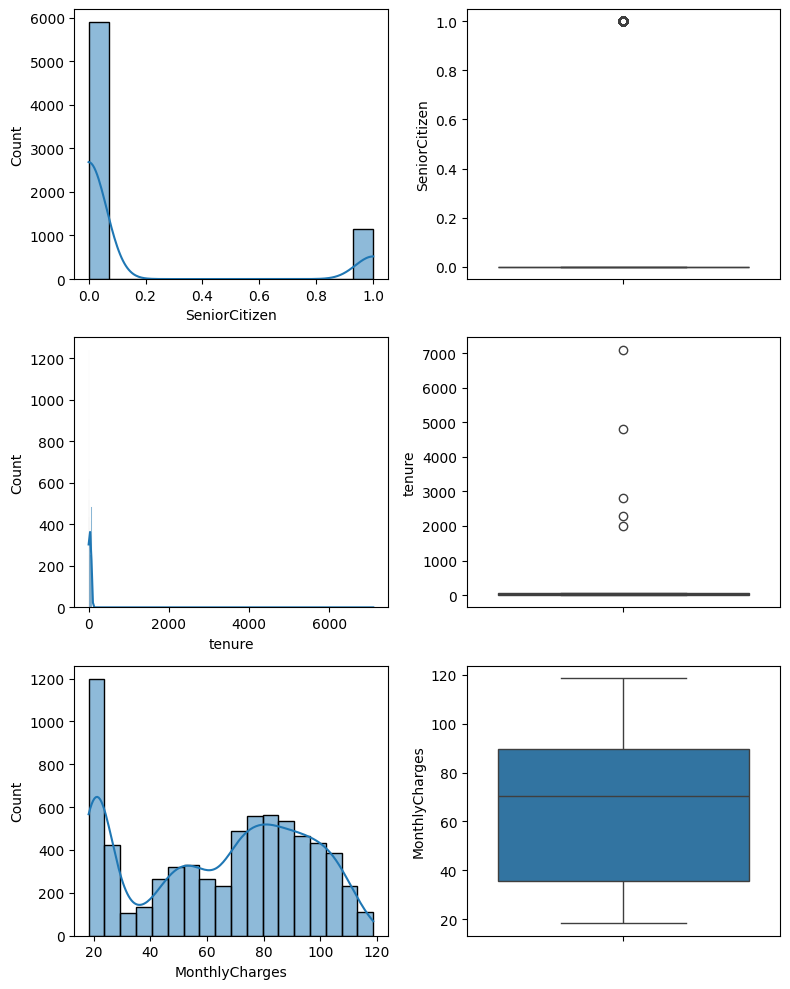

In [ ]:
fig = plt.figure(figsize=(8,10))

a=len(num_features)
b=2
c=1

for features in num_features:
  plt.subplot(a,b,c)
  sns.histplot(df[features], kde=True)
  c = c + 1

  plt.subplot(a,b,c)
  sns.boxplot(df[features])
  c = c + 1

fig.tight_layout()
plt.show()

* Inkosistensi data pada gender
* terdapat 7043 baris data dan 21 columns
* 3 column (SeniorCitizen, tenurem MonthlyChargers) bertipe data numerik dan sisanya kategorikal
* terdapat missing value di 2 features. 5 di gender dan 3 di tenure
* tidak terdapat data duplikat
* Features TotalCharges tipe datanya salah karena ada string kosong, harusnya dia numerikal
* terdapat beberapa ouliers pada features tenure
* data tidak terdistribusi normal pada monthlyChaerges

# Memvalidasi Data

Berdasarkan hasil pemeriksaan data yang telah dilakukan, dapat disimpulkan bahwa data belum lengkap atau valid sepenuhnya. Hal ini disebabkan adanya missing value pada 2 fitur (gender dan tenure), inkonsistensi data pada fitur gender, adanya outliers pada tenure, tipe data yang salah pada fitur TotalCharges yang seharusnya numerik, serta distribusi data MonthlyCharges yang belum normal. Untuk menjadikan data lebih siap digunakan dalam analisis, perlu dilakukan beberapa langkah data cleaning. Langkah ini meliputi: mengatasi missing value dengan metode imputation atau penghapusan jika relevan, mengatasi inkonsistensi data dengan menyamakan format pada gender, mengubah tipe data TotalCharges menjadi numerik, serta mempertimbangkan transformasi atau rekonstruksi data pada MonthlyCharges untuk distribusi yang lebih seimbang dan menyesuaikan penanganan outliers pada tenure sesuai metode yang tepat.

# Menentukan Label Data

# Membersihkan Data

### Gender

In [ ]:
df['gender'].value_counts(dropna=False)

,count
gender,
Male,3550
Female,3483
NaN,5
M,3
F,2


In [ ]:
# Menyamakan value menggunakan method replcae
df['gender'] = df['gender'].replace('F', 'Female')
df['gender'] = df['gender'].replace('M', 'Male')

# Mengisi missing value berdasarkan proporsi
gender_count = df['gender'].value_counts(normalize=True)
male_proportion = gender_count['Male']
female_proportion = gender_count['Female']
missing_count = df['gender'].isnull().sum()
fill_values = random.choices(['Male', 'Female'], weights=[male_proportion, female_proportion], k=missing_count)
df.loc[df['gender'].isnull(), 'gender'] = fill_values


In [ ]:

df['gender'].value_counts(dropna=False)

,count
gender,
Male,3556
Female,3487


### tenure

In [ ]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
df['tenure'].isnull().sum()

0

In [ ]:
# Mengatasi outliers
"""
Karena tenure berisi informasi berapa lama(bulan) customer telah meggunakan jasa perusahaan.
Dan angka outlier disini berada di rentang yang tidak normal sehingga diputuskan untuk mengubah outlier tersebut untuk berada dalam rentang wajar
"""

# Menghitung percentile ke-95
percintile_95 = df['tenure'].quantile(0.95)
# Mengganti outliers denga nilai percentile ke-95
df['tenure'] = np.where(df['tenure'] > percintile_95, percintile_95, df['tenure'])

### TotalCharges

In [ ]:
# Menghitung jumlah string kosong yang ada pada TotalChargers
count = df['TotalCharges'].value_counts().get(' ')
count

11

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# Menampilkan dan menhitung baris yang memiliki nan
row_with_nan = df[df['TotalCharges'].isnull()]
df['TotalCharges'].isnull().sum()

11

In [ ]:
row_with_nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
row_with_nan = df[df['TotalCharges'].isnull()]
df['TotalCharges'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
num_features = [features for features in df.columns if df[features].dtypes != 'O']
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

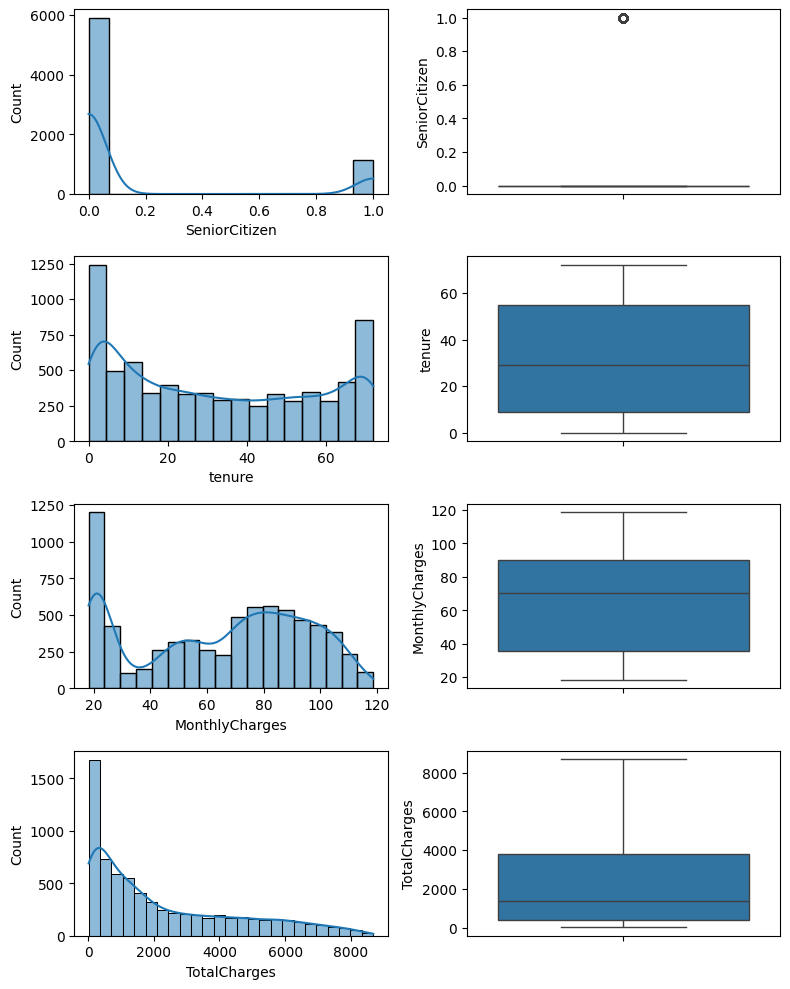

In [ ]:
fig = plt.figure(figsize=(8,10))

a=len(num_features)
b=2
c=1

for features in num_features:
  plt.subplot(a,b,c)
  sns.histplot(df[features], kde=True)
  c = c + 1

  plt.subplot(a,b,c)
  sns.boxplot(df[features])
  c = c + 1

fig.tight_layout()
plt.show()

# Transformasi Data non-numerik to numerik

In [ ]:
label_encoder = {}
churn_mapping = {'No': 1, 'Yes': 0}

for feature in cat_features:
  if feature == 'Churn':
    df['Churn_encoded'] = df['Churn'].map(churn_mapping)
  else:
    le = LabelEncoder()
    df[feature + '_encoded'] = le.fit_transform(df[feature])
    label_encoder[feature] = le



In [ ]:
# value_to_decode_0 = label_encoder['Churn'].inverse_transform([0])
# value_to_decode_1 = label_encoder['Churn'].inverse_transform([1])
# value_to_decode_0, value_to_decode_1

In [ ]:
label_encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [ ]:
df_transformed = df.copy()

encode_col = [col for col in df_transformed.columns if col.endswith('_encoded')]
encode_col = encode_col + num_features
df_transformed = df_transformed[encode_col]
df_transformed = df_transformed.drop('TotalCharges_encoded', axis=1)
df_transformed

,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,1,0,1.00,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1,0,34.00,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,0,2.00,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1,0,45.00,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,0,2.00,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1,0,24.00,84.80,1990.50
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,1,0,72.00,103.20,7362.90
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,1,0,11.00,29.60,346.45
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,0,1,4.00,74.40,306.60


In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender_encoded            7043 non-null   int64  
 1   Partner_encoded           7043 non-null   int64  
 2   Dependents_encoded        7043 non-null   int64  
 3   PhoneService_encoded      7043 non-null   int64  
 4   MultipleLines_encoded     7043 non-null   int64  
 5   InternetService_encoded   7043 non-null   int64  
 6   OnlineSecurity_encoded    7043 non-null   int64  
 7   OnlineBackup_encoded      7043 non-null   int64  
 8   DeviceProtection_encoded  7043 non-null   int64  
 9   TechSupport_encoded       7043 non-null   int64  
 10  StreamingTV_encoded       7043 non-null   int64  
 11  StreamingMovies_encoded   7043 non-null   int64  
 12  Contract_encoded          7043 non-null   int64  
 13  PaperlessBilling_encoded  7043 non-null   int64  
 14  PaymentM

## Cek Korelasi

<Axes: >

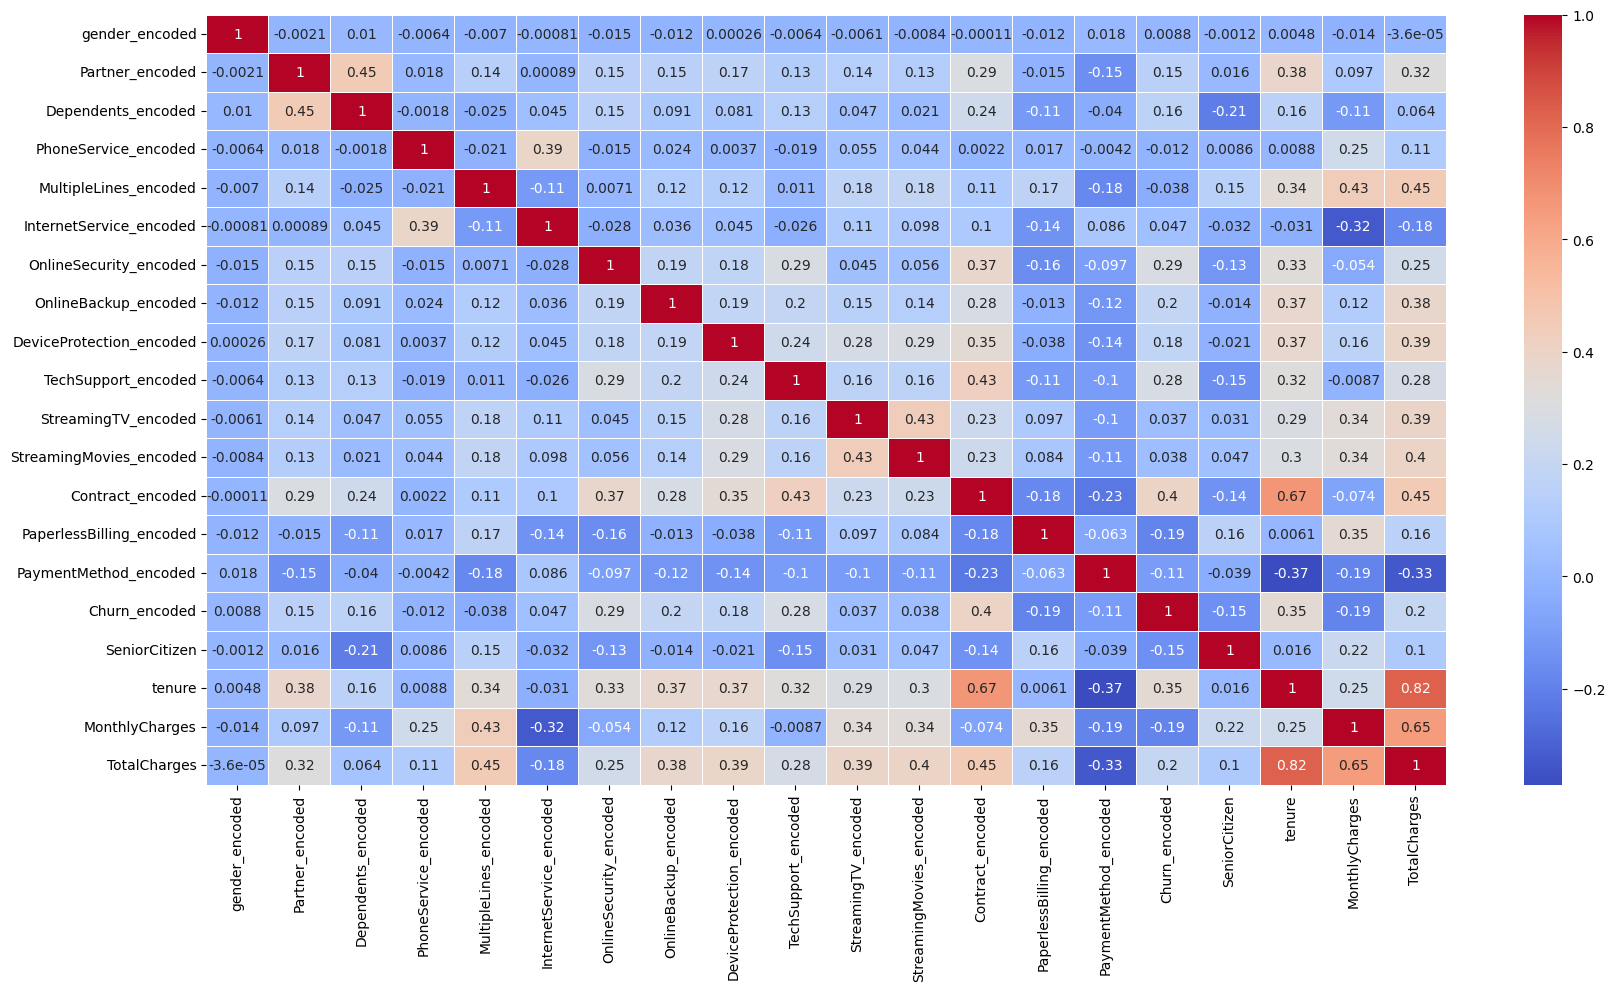

In [ ]:
corr_matrix = df_transformed.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
corr_out = corr_matrix['Churn_encoded'].abs().sort_values(ascending=False)
corr_out

,Churn_encoded
Churn_encoded,1.00
Contract_encoded,0.40
tenure,0.35
OnlineSecurity_encoded,0.29
TechSupport_encoded,0.28
TotalCharges,0.20
OnlineBackup_encoded,0.20
MonthlyCharges,0.19
PaperlessBilling_encoded,0.19
DeviceProtection_encoded,0.18


# Konstruksi Data

Tidak dilakukan rekonstruksi data

# Menentukan Label Data

Karena data tidak direkonstruksi maka label pada dataset masih sama seperti semula

# Membangun Model

In [ ]:
# Mengambil variable yang memiliki korelasi > 0.15 dengan target variable
X = corr_out[corr_out > 0.15]
X.drop('Churn_encoded', inplace=True)

X = df_transformed[X.index]
y = df_transformed['Churn_encoded']

# Membagi data menjadi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decission Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Akurasi :', accuracy)
print('Presisi :', precision)
print('Recall :', recall)
print('F1 Score :', f1)

Akurasi : 0.7281760113555713
Presisi : 0.8154589371980676
Recall : 0.8146718146718147
F1 Score : 0.8150651859005311


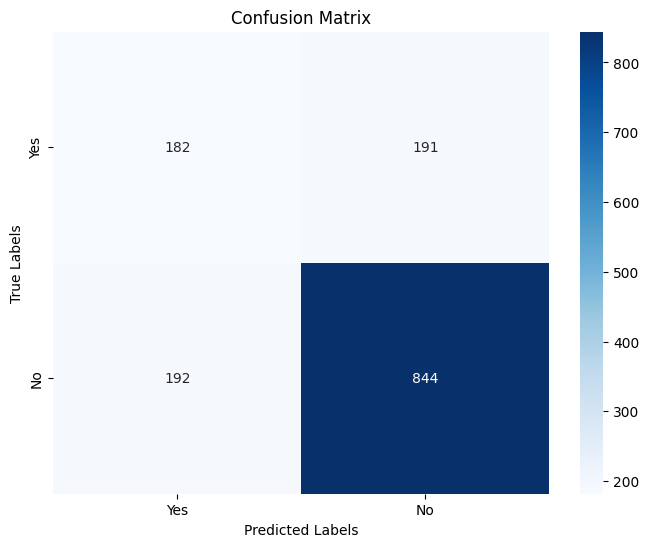

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yes', 'No'],
            yticklabels=['Yes', 'No'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Dari confusion matrix tersebut didapatkan <br>
* True Positif 182: model memprediksi positif dan sebenarnya positif
* True Negatif 844 : model memprediksi negatif dan sebenarnya negatif
* False Positif 192 : model memprediksi positif dan sebenarnya positif
* False Negatif 191 : Model memprediksi negatif tetapi sebenarnya positif

In [ ]:
importance = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                     Feature  Importance
6             MonthlyCharges        0.27
4               TotalCharges        0.23
0           Contract_encoded        0.17
1                     tenure        0.12
2     OnlineSecurity_encoded        0.05
11           Partner_encoded        0.03
7   PaperlessBilling_encoded        0.03
9         Dependents_encoded        0.03
10             SeniorCitizen        0.02
3        TechSupport_encoded        0.02
5       OnlineBackup_encoded        0.02
8   DeviceProtection_encoded        0.02


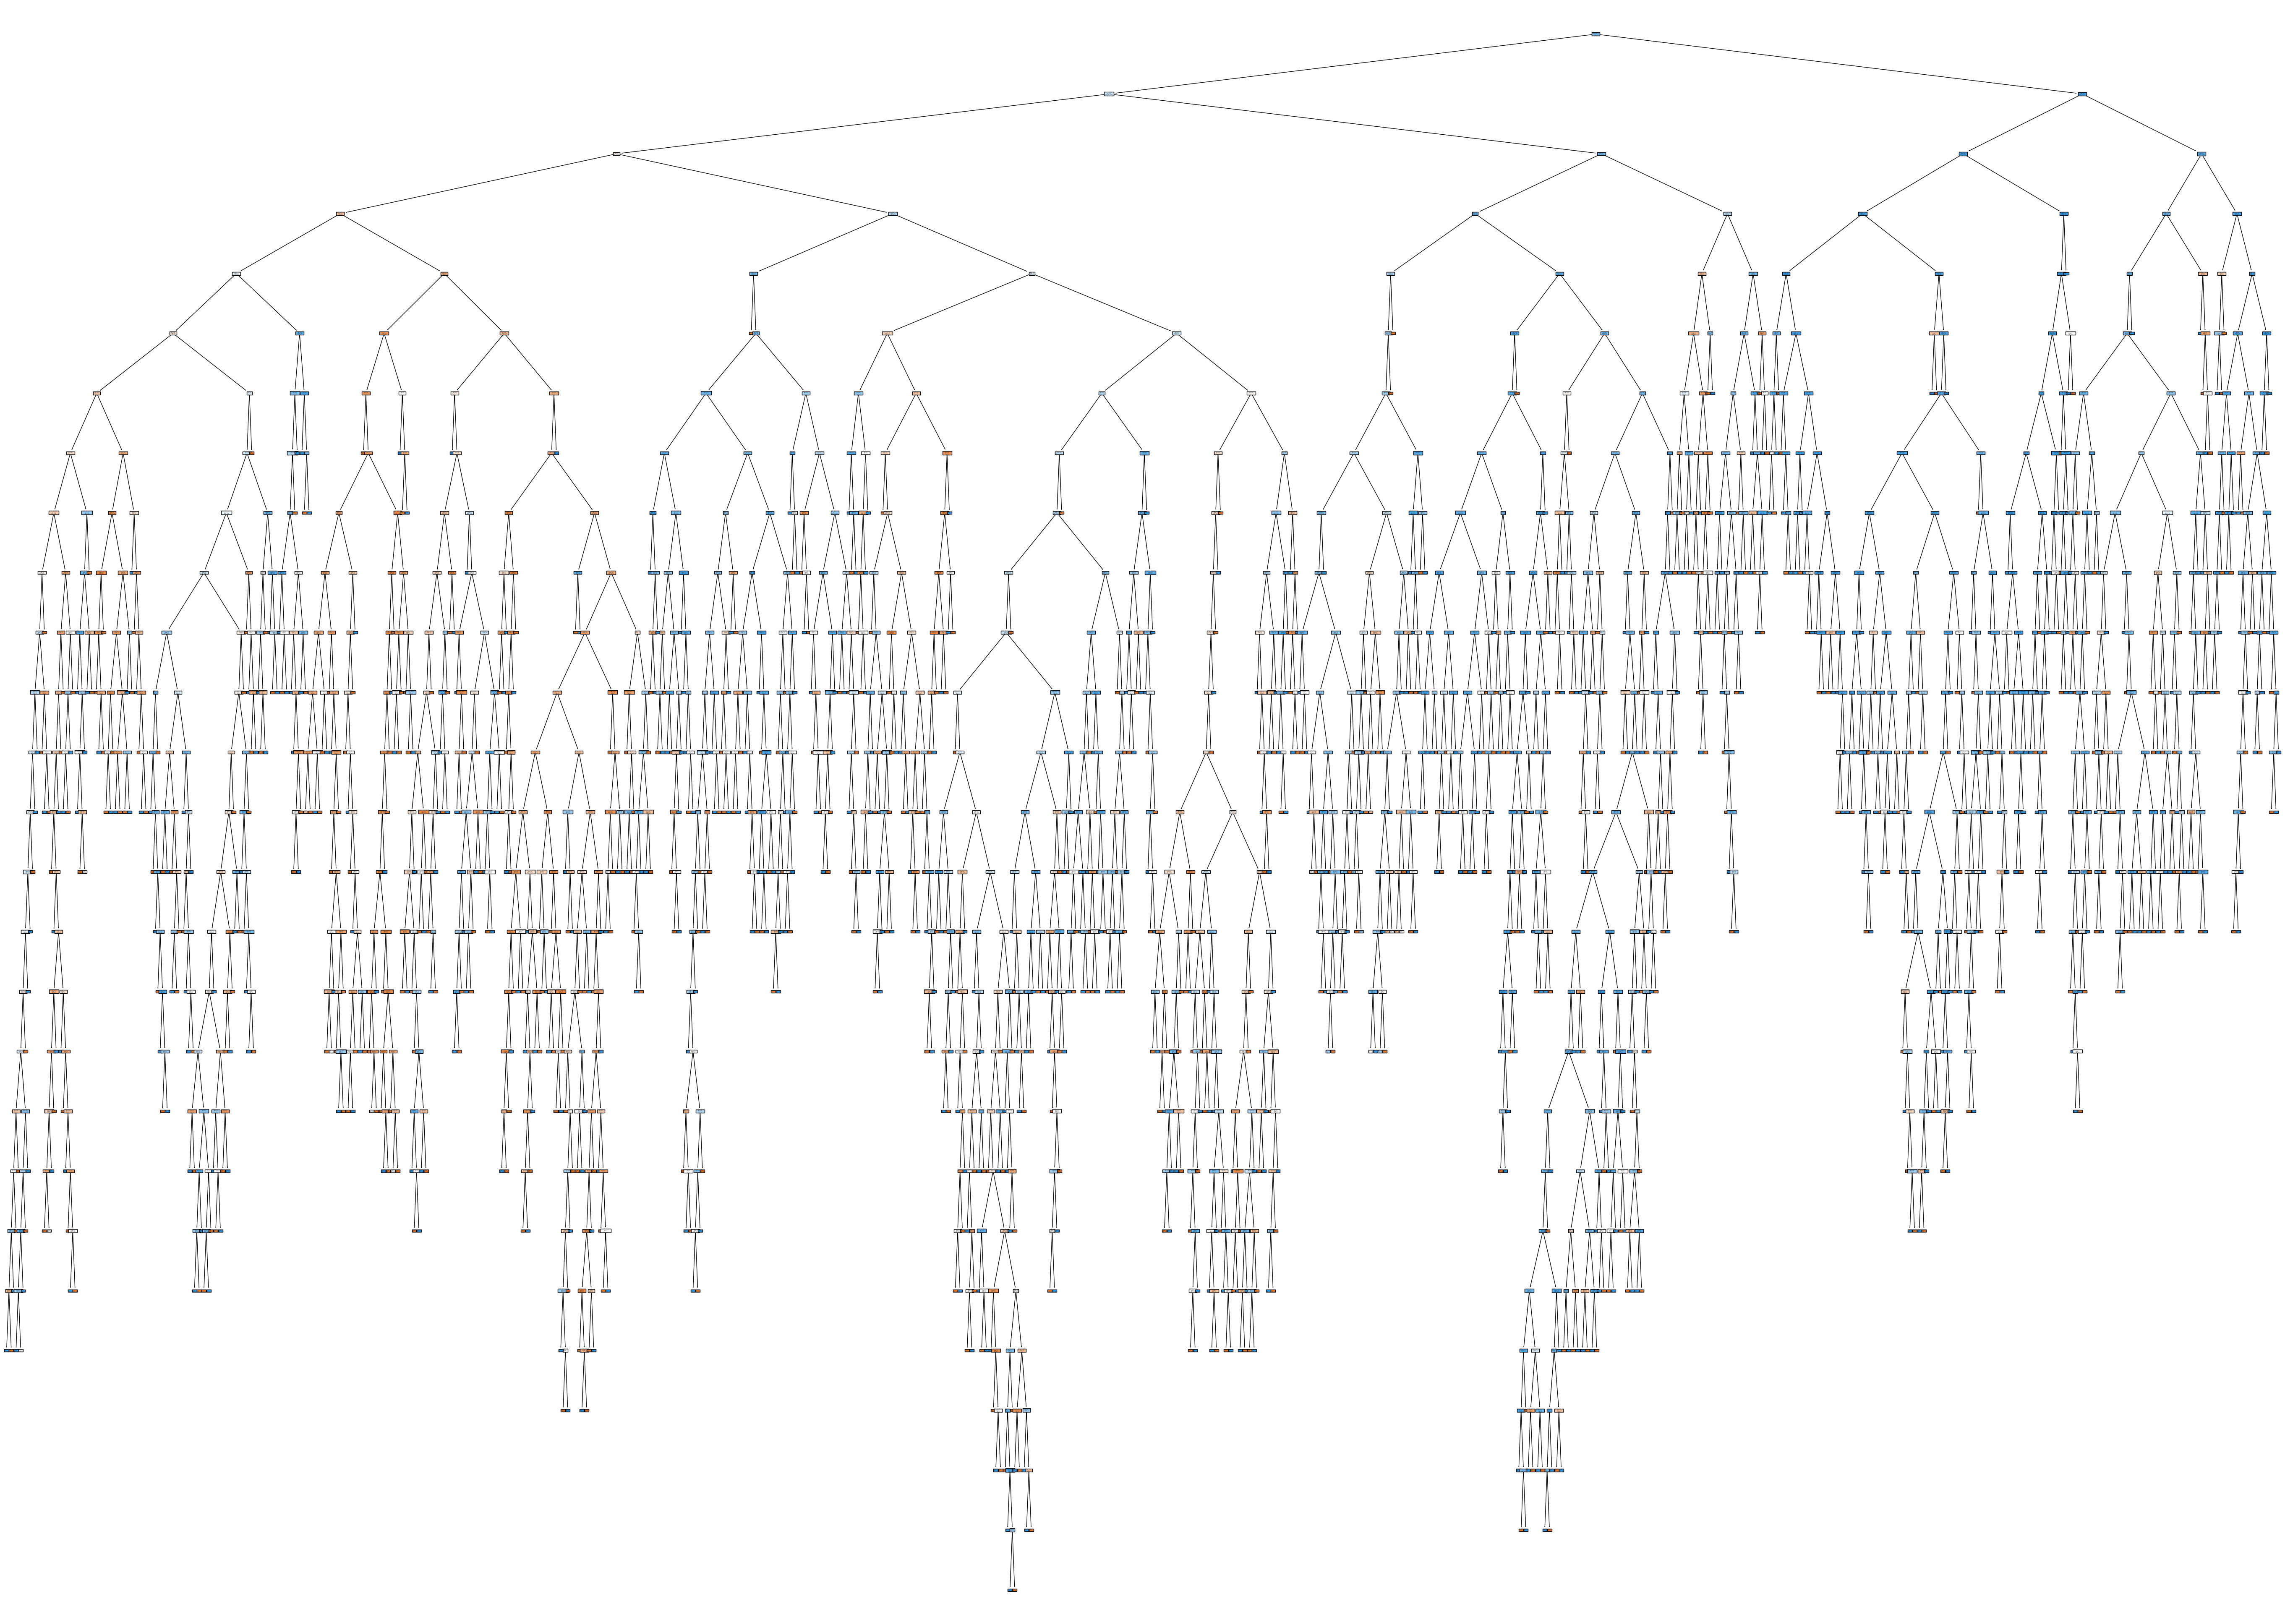

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(70, 50))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

## Evaluasi Hail Pemodelan

In [ ]:
X.columns

Index(['Contract_encoded', 'tenure', 'OnlineSecurity_encoded',
       'TechSupport_encoded', 'TotalCharges', 'OnlineBackup_encoded',
       'MonthlyCharges', 'PaperlessBilling_encoded',
       'DeviceProtection_encoded', 'Dependents_encoded', 'SeniorCitizen',
       'Partner_encoded'],
      dtype='object')

In [ ]:
label_encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [ ]:
# Input data baru
Contract_encoded = 'Two year'
tenure = 10
OnlineSecurity_encoded = 'Yes'
TechSupport_encoded = 'Yes'
TotalCharges = 100
OnlineBackup_encoded = "Yes"
MonthlyCharges = 80
PaperlessBilling_encoded = 'Yes'
DeviceProtection_encoded = "Yes"
Dependents_encoded = "Yes"
SeniorCitizen = 1
Partner_encoded = "Yes"

# Ubah menjadi array
new_data = np.array([[Contract_encoded,
                     tenure,
                     OnlineSecurity_encoded,
                     TechSupport_encoded,
                     TotalCharges,
                      OnlineBackup_encoded,
                      MonthlyCharges,
                      PaperlessBilling_encoded,
                      DeviceProtection_encoded,
                      Dependents_encoded,
                      SeniorCitizen,
                      Partner_encoded]])

# ubah menjadi dataframe agar bisa transformasi
new_df = pd.DataFrame(new_data, columns=['Contract',
                                         'tenure',
                                         'OnlineSecurity',
                                         'TechSupport',
                                         'TotalCharges',
                                         'OnlineBackup',
                                         'MonthlyCharges',
                                         'PaperlessBilling',
                                         'DeviceProtection',
                                         'Dependents',
                                         'SeniorCitizen',
                                         'Partner'])
# Transformasi data baru
for feature in new_df.columns:
    if feature in label_encoder:
        print(feature, "ada di label_encoder, melakukan transformasi")
        le = label_encoder[feature]
        try:
            new_df[feature] = le.transform(new_df[feature])
        except ValueError as e:
            print(f"Error pada {feature}: {e}")
    else:
        print(feature, "tidak ada di label_encoder, dilewati")

print("\nDataFrame setelah transformasi:")
new_df.rename(columns={'Contract':'Contract_encoded',
                        'OnlineSecurity':'OnlineSecurity_encoded',
                        'TechSupport':'TechSupport_encoded',
                        'OnlineBackup':'OnlineBackup_encoded',
                        'PaperlessBilling':'PaperlessBilling_encoded',
                        'DeviceProtection':'DeviceProtection_encoded',
                        'Dependents':'Dependents_encoded',
                        'Partner':'Partner_encoded'}, inplace=True)





Contract ada di label_encoder, melakukan transformasi
tenure tidak ada di label_encoder, dilewati
OnlineSecurity ada di label_encoder, melakukan transformasi
TechSupport ada di label_encoder, melakukan transformasi
TotalCharges ada di label_encoder, melakukan transformasi
Error pada TotalCharges: y contains previously unseen labels: [100.0]
OnlineBackup ada di label_encoder, melakukan transformasi
MonthlyCharges tidak ada di label_encoder, dilewati
PaperlessBilling ada di label_encoder, melakukan transformasi
DeviceProtection ada di label_encoder, melakukan transformasi
Dependents ada di label_encoder, melakukan transformasi
SeniorCitizen tidak ada di label_encoder, dilewati
Partner ada di label_encoder, melakukan transformasi

DataFrame setelah transformasi:


In [ ]:
# Lakukan prediksi pada data baru
new_predictions = model.predict(new_df)

# Jika Anda ingin melihat hasil prediksi
print("Hasil Prediksi untuk data baru:")
if new_predictions[0] == 1:
  print("Pelanggan akan churn")
else:
  print("Pelanggan tidak akan churn")



Hasil Prediksi untuk data baru:
Pelanggan akan churn


## XGBoost

In [ ]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Akurasi :', accuracy)
print('Presisi :', precision)
print('Recall :', recall)
print('F1 Score :', f1)

Akurasi : 0.7906316536550745
Presisi : 0.838975297346752
Recall : 0.8851351351351351
F1 Score : 0.8614372945044622


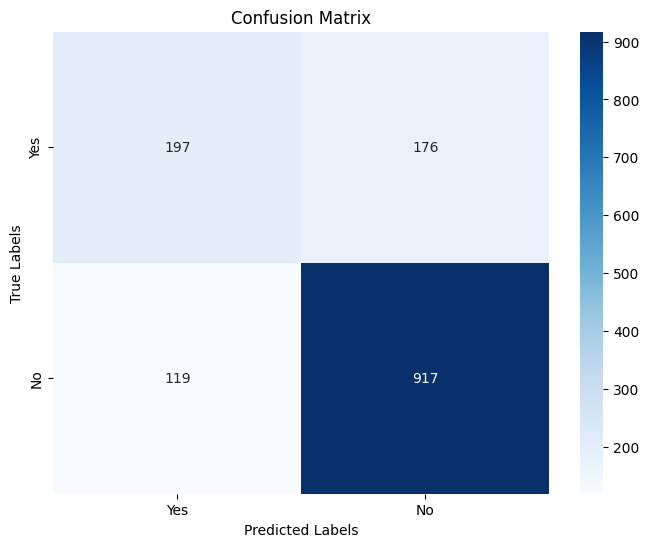

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yes', 'No'],
            yticklabels=['Yes', 'No'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Dari confusion matrix tersebut didapatkan <br>
* True Positif 197: model memprediksi positif dan sebenarnya positif
* True Negatif 917 : model memprediksi negatif dan sebenarnya negatif
* False Positif 119 : model memprediksi positif dan sebenarnya positif
* False Negatif 176 : Model memprediksi negatif tetapi sebenarnya positif

In [ ]:
importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importances': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importances', ascending=False)
print(feature_importance_df)

                     Feature  Importances
0           Contract_encoded         0.52
2     OnlineSecurity_encoded         0.12
3        TechSupport_encoded         0.07
1                     tenure         0.04
6             MonthlyCharges         0.04
7   PaperlessBilling_encoded         0.04
10             SeniorCitizen         0.03
5       OnlineBackup_encoded         0.03
4               TotalCharges         0.03
8   DeviceProtection_encoded         0.03
9         Dependents_encoded         0.03
11           Partner_encoded         0.02


<Figure size 4000x10000 with 0 Axes>

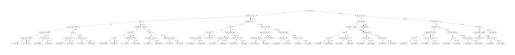

In [ ]:
import xgboost as xgb
# Visualisasi pohon keputusan pertama
plt.figure(figsize=(40, 100))
xgb.plot_tree(model, num_trees=0)  # num_trees menentukan pohon ke-0 yang akan divisualisasikan
plt.show()

## Evaluasi Hail Pemodelan

In [ ]:
X.columns

Index(['Contract_encoded', 'tenure', 'OnlineSecurity_encoded',
       'TechSupport_encoded', 'TotalCharges', 'OnlineBackup_encoded',
       'MonthlyCharges', 'PaperlessBilling_encoded',
       'DeviceProtection_encoded', 'Dependents_encoded', 'SeniorCitizen',
       'Partner_encoded'],
      dtype='object')

In [ ]:
label_encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [ ]:
Contract_encoded = 'Two year'
tenure = 10
OnlineSecurity_encoded = 'Yes'
TechSupport_encoded = 'Yes'
TotalCharges = 100
OnlineBackup_encoded = "Yes"
MonthlyCharges = 80
PaperlessBilling_encoded = 'Yes'
DeviceProtection_encoded = "Yes"
Dependents_encoded = "Yes"
SeniorCitizen = 1
Partner_encoded = "Yes"
new_data = np.array([[Contract_encoded,
                     tenure,
                     OnlineSecurity_encoded,
                     TechSupport_encoded,
                     TotalCharges,
                      OnlineBackup_encoded,
                      MonthlyCharges,
                      PaperlessBilling_encoded,
                      DeviceProtection_encoded,
                      Dependents_encoded,
                      SeniorCitizen,
                      Partner_encoded]])

new_df = pd.DataFrame(new_data, columns=['Contract',
                                         'tenure',
                                         'OnlineSecurity',
                                         'TechSupport',
                                         'TotalCharges',
                                         'OnlineBackup',
                                         'MonthlyCharges',
                                         'PaperlessBilling',
                                         'DeviceProtection',
                                         'Dependents',
                                         'SeniorCitizen',
                                         'Partner'])
# Transformasi data baru
for feature in new_df.columns:
    if feature in label_encoder:
        print(feature, "ada di label_encoder, melakukan transformasi")
        le = label_encoder[feature]
        try:
            new_df[feature] = le.transform(new_df[feature])
        except ValueError as e:
            print(f"Error pada {feature}: {e}")
    else:
        print(feature, "tidak ada di label_encoder, dilewati")

print("\nDataFrame setelah transformasi:")
new_df.rename(columns={'Contract':'Contract_encoded',
                        'OnlineSecurity':'OnlineSecurity_encoded',
                        'TechSupport':'TechSupport_encoded',
                        'OnlineBackup':'OnlineBackup_encoded',
                        'PaperlessBilling':'PaperlessBilling_encoded',
                        'DeviceProtection':'DeviceProtection_encoded',
                        'Dependents':'Dependents_encoded',
                        'Partner':'Partner_encoded'}, inplace=True)

new_df['tenure'] = pd.to_numeric(new_df['tenure'], errors='coerce')
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
new_df['MonthlyCharges'] = pd.to_numeric(new_df['MonthlyCharges'], errors='coerce')
new_df['SeniorCitizen'] = pd.to_numeric(new_df['SeniorCitizen'], errors='coerce')

new_df.info()





Contract ada di label_encoder, melakukan transformasi
tenure tidak ada di label_encoder, dilewati
OnlineSecurity ada di label_encoder, melakukan transformasi
TechSupport ada di label_encoder, melakukan transformasi
TotalCharges ada di label_encoder, melakukan transformasi
Error pada TotalCharges: y contains previously unseen labels: [100.0]
OnlineBackup ada di label_encoder, melakukan transformasi
MonthlyCharges tidak ada di label_encoder, dilewati
PaperlessBilling ada di label_encoder, melakukan transformasi
DeviceProtection ada di label_encoder, melakukan transformasi
Dependents ada di label_encoder, melakukan transformasi
SeniorCitizen tidak ada di label_encoder, dilewati
Partner ada di label_encoder, melakukan transformasi

DataFrame setelah transformasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Contract_encoded  

In [ ]:
# Lakukan prediksi pada data baru
new_predictions = model.predict(new_df)

# Jika Anda ingin melihat hasil prediksi
print("Hasil Prediksi untuk data baru:")
if new_predictions[0] == 1:
  print("Pelanggan akan churn")
else:
  print("Pelanggan tidak akan churn")



Hasil Prediksi untuk data baru:
Pelanggan akan churn
